In [48]:
import ee
import geemap
import pandas as pd
import dtale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold,train_test_split
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score,mean_absolute_percentage_error
import glob
import dask.dataframe as dd
from tpot import TPOTRegressor
import xarray as xr
from scipy import stats
from sklearn.svm import SVR
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import plot_partial_dependence
from warnings import filterwarnings
filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import plotly.express as px
import chart_studio.plotly as py
import folium
from folium.plugins import HeatMap
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
from folium.plugins import FastMarkerCluster
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import os
from sklearn.inspection import permutation_importance


In [49]:
df= pd.read_csv('Combined_Traffic_S2_LandSat8_S5_San_Francisco_TPOT-One_Hot_Encoding_July.csv')
df=df.drop(['system:index','Rte_SFX','PM_PFX','PM_SFX','Descriptn','County','Lat_S_or_W', 'Lat_N_or_E', 'Lon_S_or_W',
            'Lon_N_or_E','OBJECTID','OBJECTID_1','Route','District','Postmile'], axis=1)

df=df.dropna(axis=0)

#df=df[df["Lat_S_or_W"].str.contains("Left Skipped - Input PM on Right Ind. Alignment")==False]

#df=df[df["Lat_N_or_E"].str.contains("Right Skipped - Input PM on Left Ind. Alignment")==False]

dtale.show(df)

In [50]:
df.columns

Index(['Back_pk_m', 'Back_AADT', 'Ahead_AADT', 'Back_pk_h', 'Ahead_pk_h',
       'Ahead_pk_m', 'B8A', 'B10', 'B11', 'B12', 'B11_1', 'B1', 'B2', 'B3',
       'B4', 'B5', 'NO2_column_number_density', 'B6', 'B7', 'B8', 'B9',
       'sr_aerosol', 'B6_1', 'B7_1', 'B4_1', 'B5_1', 'B2_1', 'B3_1', 'B1_1'],
      dtype='object')

In [51]:
X=df.drop('NO2_column_number_density',axis=1).values
y=df['NO2_column_number_density'].values

scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
df_Los_Angeles= pd.read_csv('Combined_Traffic_S2_LandSat8_S5_Los_Angeles_TPOT-One_Hot_Encoding_July.csv')


df_Los_Angeles=df_Los_Angeles.drop(['system:index','Rte_SFX','PM_PFX','PM_SFX','Descriptn','County','Lat_S_or_W', 'Lat_N_or_E', 'Lon_S_or_W',
            'Lon_N_or_E','OBJECTID','OBJECTID_1','Route','District','Postmile'], axis=1)

df_Los_Angeles=df_Los_Angeles.dropna(axis=0)

#df_Los_Angeles=df_Los_Angeles[df_Los_Angeles["Lat_S_or_W"].str.contains("Left Skipped - Input PM on Right Ind. Alignment")==False]

#df_Los_Angeles=df_Los_Angeles[df_Los_Angeles["Lat_N_or_E"].str.contains("Right Skipped - Input PM on Left Ind. Alignment")==False]

X_Los_Angeles=df_Los_Angeles.drop('NO2_column_number_density',axis=1).values
y_Los_Angeles=df_Los_Angeles['NO2_column_number_density'].values

scaler=MinMaxScaler()
X_Los_Angeles=scaler.fit_transform(X_Los_Angeles)
y_Los_Angeles=scaler.fit_transform(y_Los_Angeles.reshape(-1, 1))

X_train_Los_Angeles, X_test_Los_Angeles, y_train_Los_Angeles, y_test_Los_Angeles = train_test_split(X_Los_Angeles, y_Los_Angeles, test_size=0.30, random_state=42)

In [53]:
# df_Los_Angeles= pd.read_csv('Combined_Traffic_S2_LandSat8_S5_Los_Angeles_TPOT-One_Hot_Encoding_July.csv')
# dtale.show(X_Los_Angeles)

In [54]:
# df_Texas= pd.read_csv('Combined_ESRI_S2_LandSat8_S5_Texas_TPOT July.csv')
# df_Texas=df_Texas.drop('system:index', axis=1)

# X_Texas=df_Texas.drop('NO2_column_number_density',axis=1).values
# y_Texas=df_Texas['NO2_column_number_density'].values

# scaler=MinMaxScaler()
# X_Texas=scaler.fit_transform(X_Texas)
# y_Texas=scaler.fit_transform(y_Texas.reshape(-1, 1))

# X_train_Texas, X_test_Texas, y_train_Texas, y_test_Texas = train_test_split(X_Texas, y_Texas, test_size=0.30, random_state=42)


In [55]:
# df_North_Dakota= pd.read_csv('Combined_ESRI_S2_LandSat8_S5_North_Dakota_TPOT July.csv')
# df_North_Dakota=df_North_Dakota.drop('system:index', axis=1)


# X_North_Dakota=df_North_Dakota.drop('NO2_column_number_density',axis=1).values
# y_North_Dakota=df_North_Dakota['NO2_column_number_density'].values

# scaler=MinMaxScaler()
# X_North_Dakota=scaler.fit_transform(X_North_Dakota)
# y_North_Dakota=scaler.fit_transform(y_North_Dakota.reshape(-1, 1))

# X_train_North_Dakota, X_test_North_Dakota, y_train_North_Dakota, y_test_North_Dakota = train_test_split(X_North_Dakota, y_North_Dakota, test_size=0.30, random_state=42)


In [56]:
#dtale.show(df_North_Dakota)

In [57]:
# df_Washington_DC= pd.read_csv('Combined_S2_LandSat8_S5_Washington_DC_July_5000_Points.csv')
# X_Washington_DC=df_Washington_DC.drop('NO2_column_number_density',axis=1).values
# y_Washington_DC=df_Washington_DC['NO2_column_number_density'].values

# scaler=MinMaxScaler()
# X_Washington_DC=scaler.fit_transform(X_Washington_DC)
# y_Washington_DC=scaler.fit_transform(y_Washington_DC.reshape(-1, 1))

# X_train_Washington_DC, X_test_Washington_DC, y_train_Washington_DC, y_test_Washington_DC = train_test_split(X_Washington_DC, y_Washington_DC, test_size=0.30, random_state=42)

In [58]:
model = GradientBoostingRegressor(alpha=0.85, learning_rate=0.5, loss='lad', max_depth=15, max_features=0.9500000000000001,
                                min_samples_leaf=12, min_samples_split=7, n_estimators=100, subsample=0.6500000000000001)
# fit model
model.fit(X_train,y_train)
# make a prediction
prediction=model.predict(X_test)
print('Training Accuracy : %.3f'% model.score(X_train,y_train))

print('Test Accuracy : %.3f'%model.score(X_test,y_test))

Training Accuracy : 0.999
Test Accuracy : 0.995


Mean Squared Error = 0.00022613814740023996
Mean absolute percentage error = 145275494168.48587


Text(0, 0.5, 'NO2_column_number_density')

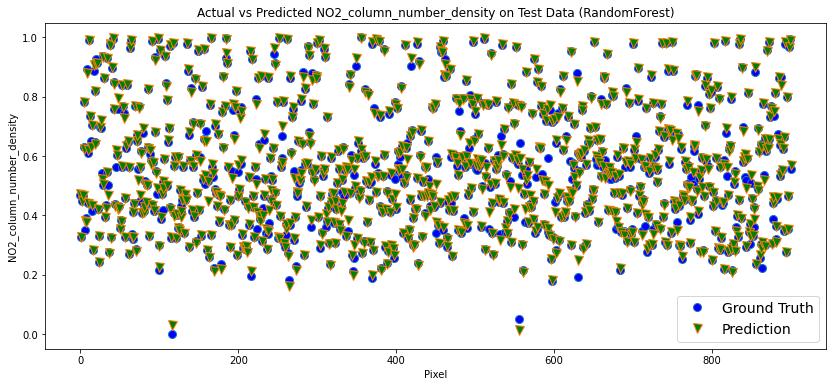

In [59]:
prediction=model.predict(X_test)
MSE=mean_squared_error(y_test,prediction)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test,prediction)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Test Data (RandomForest)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')


Mean Squared Error = 0.034844945973910676
Mean absolute percentage error = 0.3966024478008646
Accuracy for Los_Angeles: 0.005


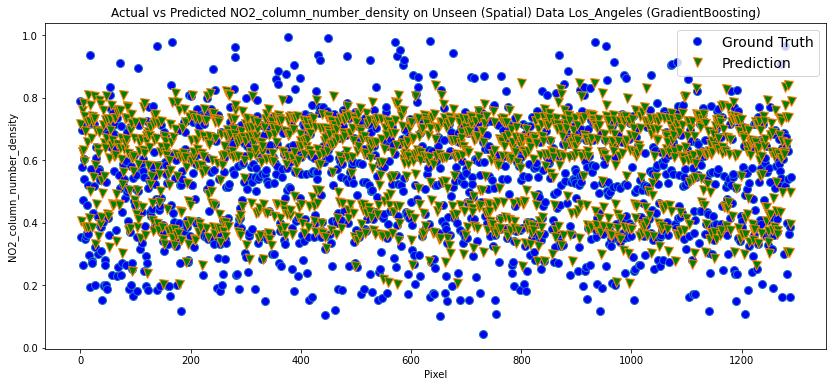

In [60]:
prediction_Los_Angeles=model.predict(X_test_Los_Angeles)
MSE=mean_squared_error(y_test_Los_Angeles,prediction_Los_Angeles)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_Los_Angeles,prediction_Los_Angeles)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_Los_Angeles,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_Los_Angeles,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Los_Angeles (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

print('Accuracy for Los_Angeles: %.3f'%model.score(X_test_Los_Angeles,y_test_Los_Angeles))

In [61]:
# prediction_Texas=model.predict(X_test_Texas)
# MSE=mean_squared_error(y_test_Texas,prediction_Texas)
# print("Mean Squared Error =",MSE)

# MAPE=mean_absolute_percentage_error(y_test_Texas,prediction_Texas)
# print("Mean absolute percentage error =",MAPE)


# fig = plt.figure(figsize=(14,6))
# plt.plot(y_test_Texas,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
# plt.plot(prediction_Texas,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
# plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Texas (GradientBoosting)')
# plt.legend(loc='best',prop={'size':14})
# plt.xlabel('Pixel')
# plt.ylabel('NO2_column_number_density')

# print('Accuracy for Texas: %.3f'%model.score(X_test_Texas,y_test_Texas))

In [62]:
# prediction_North_Dakota=model.predict(X_test_North_Dakota)
# MSE=mean_squared_error(y_test_North_Dakota,prediction_North_Dakota)
# print("Mean Squared Error =",MSE)

# MAPE=mean_absolute_percentage_error(y_test_North_Dakota,prediction_North_Dakota)
# print("Mean absolute percentage error =",MAPE)


# fig = plt.figure(figsize=(14,6))
# plt.plot(y_test_North_Dakota,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
# plt.plot(prediction_North_Dakota,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
# plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data North_Dakota (GradientBoosting)')
# plt.legend(loc='best',prop={'size':14})
# plt.xlabel('Pixel')
# plt.ylabel('NO2_column_number_density')


# print('Accuracy for North_Dakota: %.3f'%model.score(X_test_North_Dakota,y_test_North_Dakota))

In [63]:
# prediction_Washington_DC=model.predict(X_test_Washington_DC)
# MSE=mean_squared_error(y_test_Washington_DC,prediction_Washington_DC)
# print("Mean Squared Error =",MSE)

# MAPE=mean_absolute_percentage_error(y_test_Washington_DC,prediction_Washington_DC)
# print("Mean absolute percentage error =",MAPE)


# fig = plt.figure(figsize=(14,6))
# plt.plot(y_test_Washington_DC,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
# plt.plot(prediction_Washington_DC,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
# plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Washington_DC (GradientBoosting)')
# plt.legend(loc='best',prop={'size':14})
# plt.xlabel('Pixel')
# plt.ylabel('NO2_column_number_density')

# print('Accuracy for Washington_DC: %.3f'%model.score(X_test_Washington_DC,y_test_Washington_DC))

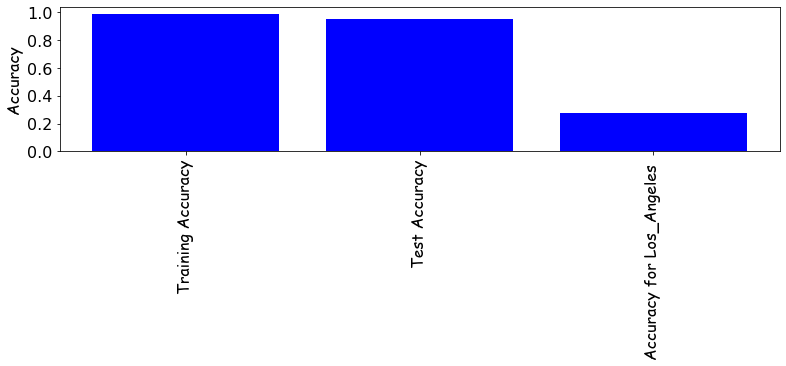

In [64]:
fig = plt.figure(figsize=(10,2))
ax = fig.add_axes([0,0,1,1])
label = ['Training Accuracy', 'Test Accuracy',
          'Accuracy for Los_Angeles ']
Accuracy = [0.988,0.951,0.278]
ax.bar(label,Accuracy,color='b')
ax.set_ylabel('Accuracy',fontsize=16, fontname='Comic Sans MS')

#ax.tick_params(axis='x', colors='blue')

#ax.set_title('Variation of E(TPa)',fontsize=16)
#plt.savefig('Accuracy', dpi=72, bbox_inches='tight')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16,rotation=90, fontname='Comic Sans MS')
plt.show()

In [65]:
#dtale.show(df_Washington_DC)

In [66]:
#dtale.show(df_Texas)

In [67]:
#dtale.show(df_North_Dakota)

In [68]:
#dtale.show(X_test_North_Dakota)

In [69]:
# df= pd.read_csv('Combined_Traffic_S2_LandSat8_S5_San_Francisco_TPOT-One_Hot_Encoding_July.csv')
# df=df.drop(['system:index','Rte_SFX','PM_PFX','PM_SFX','Descriptn'], axis=1)

# df=df.dropna(axis=0)

# # # use pd.concat to join the new columns with your original dataframe
# df = pd.concat([df,pd.get_dummies(df['County'], prefix='Class')],axis=1)

# # now drop the original 'country' column (you don't need it anymore)
# df.drop(['County'],axis=1, inplace=True)

# df=df[df["Lat_S_or_W"].str.contains("Left Skipped - Input PM on Right Ind. Alignment")==False]

# df=df[df["Lat_N_or_E"].str.contains("Right Skipped - Input PM on Left Ind. Alignment")==False]

#dtale.show(df)

In [70]:
# df_Los_Angeles= pd.read_csv('Combined_Traffic_S2_LandSat8_S5_Los_Angeles_TPOT-One_Hot_Encoding_July.csv')

# df_Los_Angeles=df_Los_Angeles.drop(['system:index','Rte_SFX','PM_PFX','PM_SFX','Descriptn'], axis=1)

# df_Los_Angeles=df_Los_Angeles.dropna(axis=0)

# # # use pd.concat to join the new columns with your original dataframe
# df_Los_Angeles = pd.concat([df_Los_Angeles,pd.get_dummies(df_Los_Angeles['County'], prefix='Class')],axis=1)

# # now drop the original 'country' column (you don't need it anymore)
# df_Los_Angeles.drop(['County'],axis=1, inplace=True)

# df_Los_Angeles=df_Los_Angeles[df_Los_Angeles["Lat_S_or_W"].str.contains("Left Skipped - Input PM on Right Ind. Alignment")==False]

# df_Los_Angeles=df_Los_Angeles[df_Los_Angeles["Lat_N_or_E"].str.contains("Right Skipped - Input PM on Left Ind. Alignment")==False]


#dtale.show(df_Los_Angeles)